### Numpy

For scientific use one of the most important packages in python is the **numpy** (numerical python) package. This package creates a new data type called an array that is a sequence that behaves mathematically like a vector. Math operations generally work on the arrays element by element. Here we cover:<br>
1. array creation
2. multidimensional arrays
3. indexing and slicing
3. reading/writing data

On import numpy is often given the nickname np. 

In [ ]:
import numpy as np

**1) array creation**<br>
There are many ways to create arrays. Lists can be converted to array, one can create arrays where are elements have the same value, or one can create arrays that increase value by a fixed amount (these are very useful for plotting and other calculations). You can specify the datatype of the elements with the dytpe key word.

In [ ]:
#array creation (1D)
a = np.array([1,2,3,4,5]) #create from list
ones = np.ones(5, dtype=np.bool) #fill with values
z = np.zeros(5, dtype=np.float) #dtype can be used to set the data type
t = np.full(5,3) #an array of five 3s
x = np.arange(0,5,1) #step by 1
y = np.linspace(0,1,5) #make 5 elements
print(a,ones,z,t,x,y)


In [ ]:
#math on arrays works on each element
print(a+5)
print(2*a)
print(a**2)
#and numpy has functions that will also work in this way
print(np.sqrt(a))
print(np.cos(a))
print(a+t*y) #multiple equal length arrays act element by element 

**2) multidimensional arrays**<br>
One can also create 2, 3 or any dimension arrays. This can be from a list of lists, but it is usually easier to create them using the filling functions, but to pass a list as the shape instead of just an int.

In [ ]:
ones = np.ones([2,2], dtype=np.bool) #the shape can be a list
z = np.zeros((2,2,2), dtype=np.float) #it can also be a tuple
t = np.full([5,2],3) #an array of five 3s
print(ones)
print(z)
print(t)

You can get information about at array with size, ndim and shape. You can rearrange the array into a new shape with the *reshape()* method or flatten it with *flatten()*.

In [ ]:
print(t.size,t.ndim,t.shape)
print(z.shape)
new_z=z.reshape([4,2]) #pass a list or tuple for the shape
print(new_z.shape)
print(z.flatten())

***3) indexing and slicing*** Just like other sequences the elements in arrays can be accessed by indexing and slicing. For 2+ dimensional arrays the index is a corresponding set of integers. Using colons of the form i:j:k creates a slice from i to j in steps of k. If k is omitted it steps by 1.

In [ ]:
a = np.arange(0,9,1,dtype=np.int)
b = a.reshape((3,3))
print(a[4],b[0,0],b[1,1])
print(b[1][1]) #you can also access like this, but it is ineffecient
print(a[0:5],a[:5:2])

A very powerful tool is to slice with a Truth array. This will only return the values that are True according to some condition

In [ ]:
print(a[a > 5]) #only elements above 5
print(a[a % 2 == 0]) #only even elements 

**4) reading and writing data** You can read and write data from numpy using the loadtxt() and savetxt() functions

In [ ]:
data = np.loadtxt('hubble1929_table1.dat',comments='#')
print(data.shape)
obj,dis,vel = np.loadtxt('hubble1929_table1.dat',unpack=True)
print(obj.shape,dis.ndim,vel.size)
np.savetxt('tmp.dat',data,fmt='%.3e') #fmt formats here 3 decimal places


### Matplotlib
Equally important for scientific analysis with python is a means to visualize one's data. There are many packages for visualization. One place to start is with matplotlib. 

One important thing to remember is that in the notebook if the last line makes a plot it will be shown in the notebook, just like a variable. But for normal python the plt.show() function must be run for interactive plotting. 
Many of the plotting functions in matplotlib are found in the pyplot subpackage which is often given the nickname plt.

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
x = np.linspace(0,2*np.pi,100)
y = np.sin(x)
plt.plot(x,y,color='green',linestyle='dashed') 
plt.show()

In [ ]:
y2=np.cos(x)
y3=np.tan(x)
plt.plot(x,y2,label='cos') #labels can be used to make a legend
plt.plot(x,y3,label='tan')
plt.legend()
plt.xlabel('degrees')
plt.title('Trig Functions')
plt.ylim([-2,2])

The plots above are plots of functions which is rarely what we have when doing scientific research. More often we have data which are discrete points and have a less clear relationship. In this case we should use a scatter plot to display them.

In [ ]:
#create some random data using numpy's random
x = np.random.random(30)
y = 0.5*x +0.1*np.random.random(30)

In [ ]:
plt.scatter(x,y,marker='v',c='red')
plt.show()

In [ ]:
z = 0.1*x + 0.25+0.05*np.random.random(30)
plt.scatter(x,y,marker='+',c='green',label='y',s=50)
plt.scatter(x,z,marker='o',c='blue',label='z')
plt.legend()
plt.show()

#### Fitting functions to data
One thing you may want to do is fit a function (like a line) to your data. There are 2 simple ways to do this. Numpy's polyfit() will fit a polynomial using least-squares, while curve_fit() from the scipy package will fit any function using a user specified function.

In [ ]:
p1 = np.polyfit(x,y,1) #1 is the degree of the polynomial so a line (x^1)
p2 = np.polyfit(x,z,2)
xvals=np.linspace(0,1,10)
plt.plot(xvals,p1[1]+p1[0]*xvals,color='green',linestyle='dashed')
plt.plot(xvals,p2[2]+p2[1]*xvals+p2[0]*xvals**2,color='blue',linestyle='dotted')
plt.scatter(x,y,marker='+',c='green',label='y',s=50)
plt.scatter(x,z,marker='o',c='blue',label='z')
plt.legend()
plt.show()

In [ ]:
import scipy.optimize as opt

def line(x,m,b):
    return m*x+b

popt,_=opt.curve_fit(line,x,y) 
plt.plot(xvals,line(xvals,popt[0],popt[1]),color='green',linestyle='dashed')
plt.scatter(x,y,marker='+',c='green',label='y')
plt.show()


#### Figure and Axis 
The examples of plotting we have just done can give a misleading sense of how matplotlib works, because we have been avoiding the figure and axis classes. However, these objects are the basis of plotting in matplotlib and for more advance plots you will need to understand them. The figure is just the everything in the plotting window while the axis refers to the plotting axis and everything that goes with them. This becomes important when you want to have more than one axis on a figure. This is easiest to do with the subplots() function though there are many ways to create figures and axis. 

In [ ]:
fig,axis=plt.subplots(nrows=1,ncols=2)
axis[0].scatter(x,y)
axis[1].scatter(x,z)
plt.show() #and we get 2 plots on the same figure

We see that scatter() like almost all of the functions we have previously used is really a method associated with an axis. We can add legends, set limits, and add labels just like we've done above for each axis. 

You'll notice in the above plot that the y-axis range on the 2 axes is very different. We can force it to be the same with the shareY keyword.

In [ ]:
fig,axis=plt.subplots(nrows=1,ncols=2,sharey=True,figsize=(6,4))
plt.subplots_adjust(hspace=0.0,wspace=0.0) #make no space between plots
axis[0].scatter(x,y)
axis[0].set_xlabel('x-stuff1')
axis[0].set_xlim([0.,0.95]) #if it goes to 1 the tickmarks overlap
axis[1].scatter(x,z)
axis[1].set_xlabel('x-stuff2')
plt.show()

### Exercise 1
Read in the data from the hubble1929_table1.dat file and plot velocity versus distance. Fit a line to the points. In a 2nd plot on the same figure plot the residuals (the difference between the points and the fit line) as a function of distance.

Another useful type of plot is the histogram. This can be made direclty in matplotlib, or one can do the calculation in numpy and then plot the results with matplotlib.

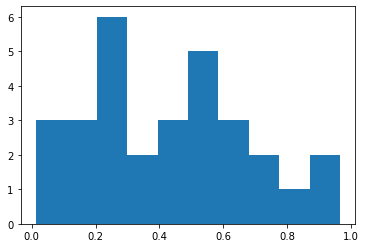

In [126]:
h,xmids,_ = plt.hist(x)

<BarContainer object of 10 artists>

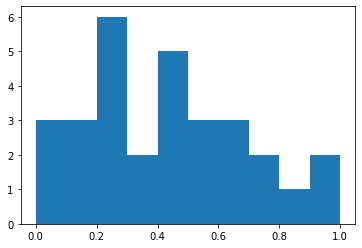

In [139]:
h2,xedges = np.histogram(x, bins=10, range=[0,1])
xmids=0.5*(xedges[0:-1]+xedges[1:])
plt.bar(xmids,h2,width=0.1)